<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500, height=450>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Детектирование объектов с помощью YOLOv3</b></h2>

<img src="https://i.ytimg.com/vi/s8Ui_kV9dhw/maxresdefault.jpg" width=600 height=450>

<h4 style="text-align: center;"><b>Составитель: Илья Захаркин (ФИВТ МФТИ, NeurusLab). По всем вопросам в Telegram: <a>@ilyazakharkin</a></b></h4>

На семинаре мы запускали SSD и Mask-RCNN из Tensorflow Object Detection API. На лекции же подробно разбирался алгоритм YOLOv3, давайте же теперь этот самый детектор и попробуем применить на практике.

<h2 style="text-align: center;"><b>YOLOv3</b></h2>

**Идея детекторов:** использовать сильную свёрточную нейросеть, натренированную на классификации, чтобы извлечь признаки из изображения, потом использовать свёрточные слои для регрессии точек боксов и классификации объектов внутри них.

Напомним, что архитектура у YOLOv3 следующая:

<img src="https://camo.githubusercontent.com/5c561504c1b01ee565764785efe5572156d4cd61/68747470733a2f2f692e696d6775722e636f6d2f546f45626c6a5a2e706e67">

Словами:

1. Картинка подаётся на вход
2. Она сжимается до размера 300х300х3
3. Пропускается через backbone-нейросеть, которая извлекает признаки -- *Darknet53*
4. Идут несколько свёрточных слоёв со свёртками 1х1 и 3х3
5. После них идёт yolo-слой: свёртка 1х1х(1 + 4 + NUM_CLASSES)
6. Далее происходит upsampling (увеличение по ширине и высоте) в 2 раза и конкатенация с feature map'ами, которые были до upsampling'а (чтобы улучшить качество)
7. Шаги 4-6 повторяются ещё 2 раза, чтобы улучшить качество детектирования мелких объектов

При обучении также: 
8. Финальный feature map специальным образом подаётся в Loss для подсчёта ошибки
9. Распространятся градиенты, как в обычном backpropagation, обновляются веса сети

В слоях используются LeakyReLU активации. Перед YOLO-слоями используются линейные активации (то есть нет нелинейности).

Как вся архитектура выглядит в коде вы можете посмотреть в этом файле: https://github.com/akozd/tensorflow_yolo_v3/blob/master/models/yolo_v3.py

Оригинальная статья с arxiv.org: https://arxiv.org/abs/1804.02767

***Примечание:*** Вы можете спросить: "Почему именно YOLOv3, ведь много других хороших детекторов?". Да, но на данный момент у YOLOv3 лучшее соотношение скорость/качество из широко применяемых нейросетевых детекторов. В этом плане он State-of-the-Art.

<h2 style="text-align: center;"><b>Задание (10 баллов)</b></h2>

***Предполагается, что Вы знакомы с TensorFlow и  свёрточными нейросетями***

Лучше выполнять этот ноутбук локально, поставив TensorFlow: `pip install tensorflow` (CPU-версия, но слишком долго работать не будет, так как обучения в задании нет, только предсказание).

Если Вы выполняете на Google Colab, то будьте готовы активно использовать переходы в подпапки (`os.chdir(*path*)`), как было на семинаре.

<img src="http://blog.yavuzz.com/image.axd?picture=/resimler/sayit.jpg">

Писать свой нейросетевой детектор с нуля -- весьма непростая задача, поэтому сейчас просто используем код человека, который смог: https://github.com/akozd/tensorflow_yolo_v3

Напомню, что скачать с Github весь репозиторий можно командой: `git clone *адрес репозитория*`. Например, репозиторий, который нужен в этом задании, скачивается так: `git clone https://github.com/akozd/tensorflow_yolo_v3`

### Этап 1 (2 балла): первичное ознакомлене с репозиторием

Прочитать README этого репозитория: https://github.com/akozd/tensorflow_yolo_v3

***Вопрос по `README.md` (1 балл)***: что автор репозитория предлагает для того, чтобы улучшить качество предсказания боксов пр обучении на собственных данных?

In [0]:
<Ответ>

*Нужно сгенерировать новые якорные боксы (anchors) с помощью алгоритма К-средних, но автор также указывает, что дефолтные anchors будут достаточно хороши на большинстве задач*

Прочитайте файл `train.py`

***Вопрос по `train.py` (1 балл)***: за что отвечает аргумент скрипта `train.py` под названием `--test_model_overfit`?

In [0]:
<Развёрнутый ответ>

*С помощью этого аргумента можно специально переобучить модель на одной картинке. Это нужно для того, чтобы следить за лоссом модели, во время переобучения он должен продолжать уменьшаться.*

### Этап 2 (3 балла): чтение кода репозитория

Теперь нужно прочитать код автора и понять, что в нём происходит. Этот репозиторий был выбран не спроста -- весь код хорошо документирован и исправно работает.  

Ваша задача состоит в том, чтобы понять, как связаны файлы друг с другом, какие файлы используются для обучения, какие для предсказания, какие вовсе не используются. Хорошая стратегия: основываясь на README.md начать разбираться с тем, как работает `detect.py`, то есть что принимает на вход и что на выход, какие сторонние файлы использует.

<img src="https://thefreshtoast.com/wp-content/uploads/2017/02/bbc-new-meme-hood-documentary.jpg" width=500 height=300>

***Задача (3 балла)***: подробно опишите структуру репозитория, пояснив, для чего нужен каждый файл. Чем более подробно вы опишите, что происходит внутри файла (можно прямо в виде "..в строчках 15-20 производится предсказание боксов по изображению.."), тем больше баллов получите.

In [0]:
<Подробное описание структуры репозитория>

**Детекция объектов на картинке - файл detect.py:**

В начале работы файла при запуске парсятся параметры запуска:
*   *path_to_input_image* - путь до картинки с объектами
*   *path_to_trained_model* - путь до обученной модели, которая собственно и будет находить объекты
*   *save_as* - кастомное название картинки с размеченными объектами для сохранения
*    *tensorboard_save_path* - путь для сохранения тензорборда - графа модели
*   *class_path* - путь до файла с названиями классов
* *anchors_path* - путь до якорных боксов
* *input_height* и *input_width* -  размеры картинки, должны делиться на 32.

После этого все параметры сохраняются в переменные.
Картинка со входа обрабатывается с помощью функции *process_image* (лежитв папке *utils* в файле *utils.py*) - приводится к формату с которым работает YOLOv3.

Дальше строится граф вычислений, для аутпута вызывается импортированная модель *yolo_v3* из папки *models*.
Далее предобработанная картинка в тф.сессии пропускается через модель, высчитываются самые вероятные боксы с помощью nms (функции также из файла* utils.py* из папки *utils*) и сохраняется новая картинка с размеченными боксами и классами.


**Тренировка модели на своём датасете - файл train.py:**

В начале аналогично парсятся параметры из командной строки:


*   *train_from_checkpoint* - путь до сохраненных весов модели
*   class_path - путь до файла с размеченными классами
* anchors_path - путь до файла с координатами якорных боксов
* data_path - путь до датасета
* *input_height* и *input_width* -  размеры картинки, должны делиться на 32.
* batch_size - размеры батча, по дефолту 32
* max_num_boxes_per_image - максимальное количество боксов на картинке, дефолт 20
* num_training_epochs - количество эпох для тренировки, дефолт 150
* learning_rate - лернинг рейт
* train_val_data_split- соотношение между тренировочными и валидационными данными, дефолт 0.9
* model_name - имя модели

Ну и также есть путь для сохранения модели, оверфит модели для отладки, сохранение модели каждые Х итераций.

После этого все  параметры сохраняются в переменные.

Далее собираем граф - указываем верные классы, верноые боксы и картинки, вызываем архитектуру модели yolo_v3 и лосс. После указываем какие слои учить, а какие заморозить.
Далее в тф.сессии обучается модель - указывается как инициализировать веса,  количество итераций, и в цикле проходится обучение по эпохам, при этом первая треть итераций обучается с замороженными слоями, а потом весь граф размораживается. Лосс на валидации записывается в тензорборд, а веса сохраняются каждые Х итераций.

### Этап 3 (5 баллов): установка нужных зависимостей, скачивание весов (`.ckpt`) и запуск `detect.py` на ваших изображениях

Разомнём пальцы и позапускаем код из репозитория на ваших изображениях (любых, однако желательно, чтобы на них были объекты из [этого списка](https://github.com/nightrome/cocostuff/blob/master/labels.md), так как изначально детектор обучен на COCO датсете).

<img src="http://static.hdw.eweb4.com/media/wallpapers_dl/1/89/882736-adventure-time-with-finn-and-jake.jpg" width=400 height=300>

Сначала убедитесь, что у вас (или на Colab) стоят все нужные зависимости (5 ссылок в разделе Dependencdies в README.md).  
Потом либо скриптом `.sh`, либо по ссылке, данной в ридми, скачайте в папку `model_weights` веса обученной на датасете COCO YOLOv3-модели.

Баллы в этом задании ставятся следующим образом:

* (1 балл) получены предсказания на любом вашем изображении (этот пункт служит подтверждением того, что у вас всё запустилось и вы смогли скачать и настроить репозиторий у себя/в колабе)  
* (1 балл) найдена кратинка, где у нейросети есть ложные срабатывания (false positives)  
* (1 балл) найдена картинка, где у нейросети есть пропуски в детекции (false negatives)  
* (1 балл) найдена картинка, где сеть детектировала успешно все объекты, хотя они сильно перекрыватся
* (1 балл) предыдущий пункт, но наоброт -- нейросеть справляется плохо

In [33]:
!pip install tensorflow==1.10.1

     |████████████████████████████████| 58.4MB 435kB/s 
     |████████████████████████████████| 3.3MB 33.3MB/s 
     |████████████████████████████████| 573kB 41.3MB/s 
     |████████████████████████████████| 12.2MB 29.6MB/s 
ERROR: spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.10.1 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.5 which is incompatible.
ERROR: fastai 1.0.52 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
  Fou

In [1]:
import tensorflow as tf
print(tf.__version__)

1.10.1


In [0]:
!git clone --quiet https://github.com/akozd/tensorflow_yolo_v3

In [2]:
!ls

sample_data  tensorflow_yolo_v3


In [0]:
import os
os.chdir('tensorflow_yolo_v3/')

In [5]:
!ls

detect.py	     models	    README.md	   utils
example.jpg	     model_weights  tensorboard    yolo_v3_detect_graph.png
example_yolo_v3.jpg  nava001.jpg    training_data  yolo_v3_train_graph.png
LICENSE		     __pycache__    train.py


In [0]:
os.chdir('model_weights/')

In [7]:
!ls

coco_pretrained_weights.ckpt.data-00000-of-00001
coco_pretrained_weights.ckpt.index
coco_pretrained_weights.ckpt.meta
coco_pretrained_weights.zip
get_pretrained_coco_weights.sh


In [18]:
!wget https://www.dropbox.com/s/hgi354dajhc9yso/coco_pretrained_weights.zip

--2019-06-05 09:50:49--  https://www.dropbox.com/s/hgi354dajhc9yso/coco_pretrained_weights.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgi354dajhc9yso/coco_pretrained_weights.zip [following]
--2019-06-05 09:50:49--  https://www.dropbox.com/s/raw/hgi354dajhc9yso/coco_pretrained_weights.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbf7cad938096e8ce1fcd7ee5c1.dl.dropboxusercontent.com/cd/0/inline/AiMxXjtlEOAjWu_GmAsaaN93G8JPn6H6ELBhgFTSJ6swHkMdh_rilLwKtUjirb5ZNw0_llYLD-YHB0sCGSIgYaIlrHpDOEWcIJSEXS2nCo3Gsw/file# [following]
--2019-06-05 09:50:50--  https://ucbf7cad938096e8ce1fcd7ee5c1.dl.dropboxusercontent.com/cd/0/inline/AiMxXjtlEOAjWu_GmAsaaN93G8JPn6H6ELBhgFTSJ6swHkMdh_rilLwKtUjirb5ZNw0_llYLD-YHB0sCGSIgYaIlrH

In [20]:
!unzip coco_pretrained_weights.zip

Archive:  coco_pretrained_weights.zip
  inflating: coco_pretrained_weights.ckpt.data-00000-of-00001  
  inflating: coco_pretrained_weights.ckpt.index  
  inflating: coco_pretrained_weights.ckpt.meta  


In [10]:
os.chdir('..')
!ls

sample_data  tensorflow_yolo_v3


In [11]:
os.chdir('tensorflow_yolo_v3/')
!ls

detect.py	     models	    README.md	   utils
example.jpg	     model_weights  tensorboard    yolo_v3_detect_graph.png
example_yolo_v3.jpg  nava001.jpg    training_data  yolo_v3_train_graph.png
LICENSE		     __pycache__    train.py


In [27]:
!wget https://varlamov.me/2016/news/nava001.jpg
!ls

--2019-06-05 09:57:47--  https://varlamov.me/2016/news/nava001.jpg
Resolving varlamov.me (varlamov.me)... 162.243.137.252
Connecting to varlamov.me (varlamov.me)|162.243.137.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 781127 (763K) [image/jpeg]
Saving to: ‘nava001.jpg’

nava001.jpg         100%[===================>] 762.82K   576KB/s    in 1.3s    

2019-06-05 09:57:49 (576 KB/s) - ‘nava001.jpg’ saved [781127/781127]

detect.py	     models	    README.md	   utils
example.jpg	     model_weights  tensorboard    yolo_v3_detect_graph.png
example_yolo_v3.jpg  nava001.jpg    training_data  yolo_v3_train_graph.png
LICENSE		     __pycache__    train.py


In [12]:
%run detect.py  --path_to_input_image=nava001.jpg

restoring model weights...
INFO:tensorflow:Restoring parameters from model_weights/coco_pretrained_weights.ckpt
feeding image found at filepath:  nava001.jpg
total inference time was: 3.9 seconds (that's 15.37 fps!)
image with detections saved as:  nava001_yolo_v3.jpg


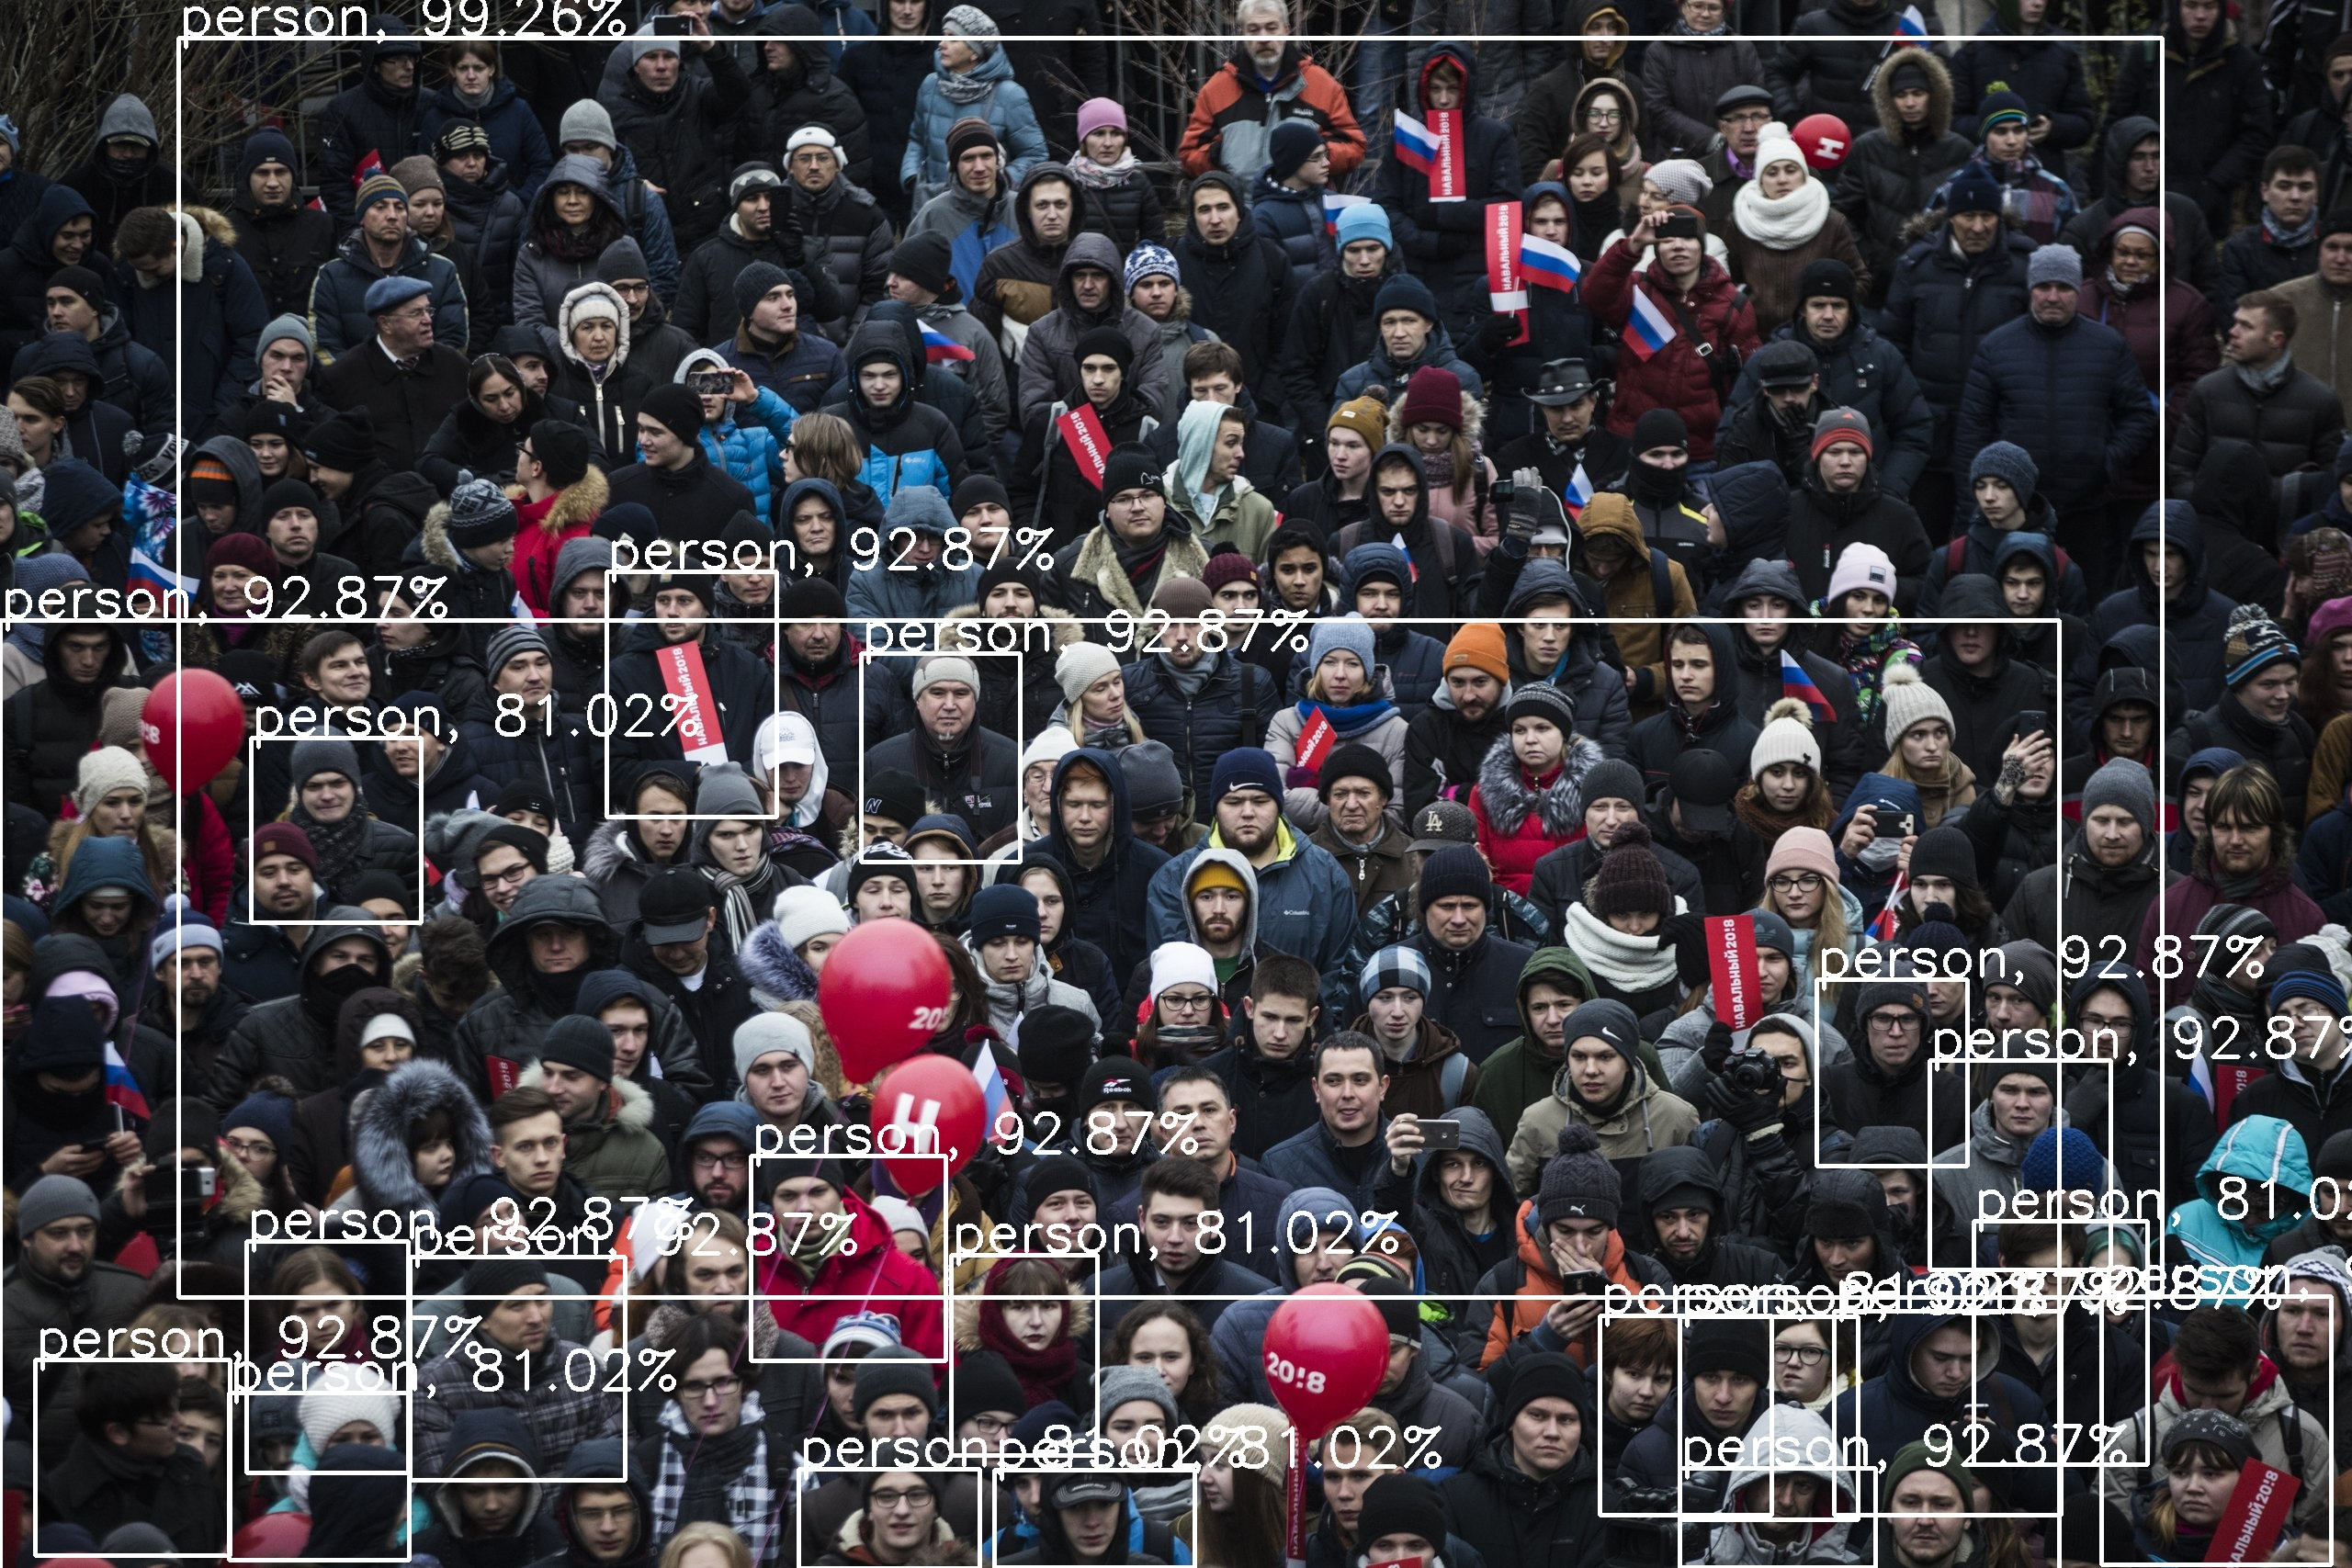

In [15]:
from IPython.display import Image
Image('nava001_yolo_v3.jpg',width=500, height=500)

**↑ Пример где сеть успешно работает, а также пример где у сети есть пропуски в детекции**

In [24]:
!wget https://vecherka74.ru/uploads/posts/2017-10/medium/1507807252_i.jpg
%run detect.py  --path_to_input_image=1507807252_i.jpg

--2019-06-05 10:15:55--  https://vecherka74.ru/uploads/posts/2017-10/medium/1507807252_i.jpg
Resolving vecherka74.ru (vecherka74.ru)... 83.220.170.168
Connecting to vecherka74.ru (vecherka74.ru)|83.220.170.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140589 (137K) [image/jpeg]
Saving to: ‘1507807252_i.jpg’

1507807252_i.jpg    100%[===================>] 137.29K   336KB/s    in 0.4s    

2019-06-05 10:15:56 (336 KB/s) - ‘1507807252_i.jpg’ saved [140589/140589]

restoring model weights...
INFO:tensorflow:Restoring parameters from model_weights/coco_pretrained_weights.ckpt
feeding image found at filepath:  1507807252_i.jpg
total inference time was: 3.83 seconds (that's 15.67 fps!)
image with detections saved as:  1507807252_i_yolo_v3.jpg


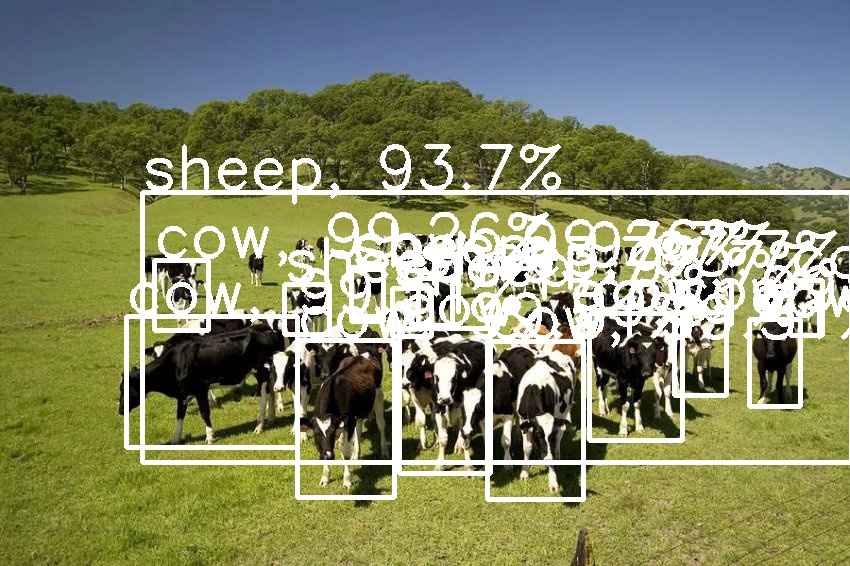

In [25]:
Image('1507807252_i_yolo_v3.jpg')

**↑Пример, где у сети есть ложные срабатывания (на картинке коровы, но она увидела овцу, также пример того, как сеть не может определить перекрывающиеся объекты (на заднем плане коровы не распознаны)↑**

In [28]:
!wget https://www.cats-british.ru/files/articles/koshki-i-sobaki-2.jpg
%run detect.py  --path_to_input_image=koshki-i-sobaki-2.jpg

--2019-06-05 10:23:00--  https://www.cats-british.ru/files/articles/koshki-i-sobaki-2.jpg
Resolving www.cats-british.ru (www.cats-british.ru)... 92.53.96.85, 2a03:6f00:1::5c35:6055
Connecting to www.cats-british.ru (www.cats-british.ru)|92.53.96.85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87162 (85K) [image/jpeg]
Saving to: ‘koshki-i-sobaki-2.jpg’

koshki-i-sobaki-2.j 100%[===================>]  85.12K  --.-KB/s    in 0.1s    

2019-06-05 10:23:01 (624 KB/s) - ‘koshki-i-sobaki-2.jpg’ saved [87162/87162]

restoring model weights...
INFO:tensorflow:Restoring parameters from model_weights/coco_pretrained_weights.ckpt
feeding image found at filepath:  koshki-i-sobaki-2.jpg
total inference time was: 3.95 seconds (that's 15.18 fps!)
image with detections saved as:  koshki-i-sobaki-2_yolo_v3.jpg


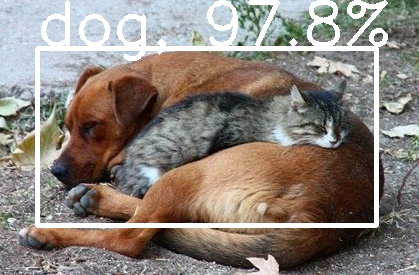

In [29]:
Image('koshki-i-sobaki-2_yolo_v3.jpg')

**↑ Еще пример того как сеть не смогла распознать перекрывающиеся объекты↑**

In [30]:
!wget https://www.alfapet.ru/wp-content/uploads/2019/04/can-cats-eat-dog-food-header-1170x650.jpg
%run detect.py  --path_to_input_image=can-cats-eat-dog-food-header-1170x650.jpg

--2019-06-05 10:26:09--  https://www.alfapet.ru/wp-content/uploads/2019/04/can-cats-eat-dog-food-header-1170x650.jpg
Resolving www.alfapet.ru (www.alfapet.ru)... 62.109.1.25
Connecting to www.alfapet.ru (www.alfapet.ru)|62.109.1.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106046 (104K) [image/jpeg]
Saving to: ‘can-cats-eat-dog-food-header-1170x650.jpg’

can-cats-eat-dog-fo 100%[===================>] 103.56K   383KB/s    in 0.3s    

2019-06-05 10:26:10 (383 KB/s) - ‘can-cats-eat-dog-food-header-1170x650.jpg’ saved [106046/106046]

restoring model weights...
INFO:tensorflow:Restoring parameters from model_weights/coco_pretrained_weights.ckpt
feeding image found at filepath:  can-cats-eat-dog-food-header-1170x650.jpg
total inference time was: 4.17 seconds (that's 14.37 fps!)
image with detections saved as:  can-cats-eat-dog-food-header-1170x650_yolo_v3.jpg


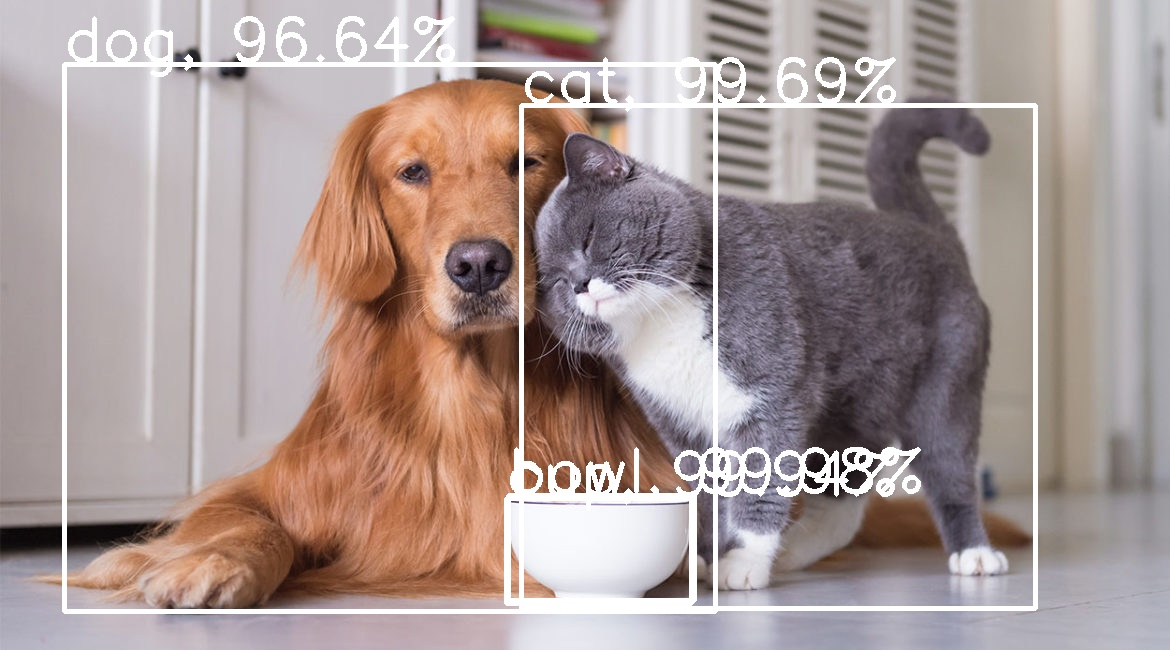

In [31]:
Image('can-cats-eat-dog-food-header-1170x650_yolo_v3.jpg')

**↑ Пример успешного разпознования перекрывающихся объектов - кошка и собака определены хорошо, и миска тоже найдена↑**

### * Дополнительный этап 4 (10 баллов): обучение детектора на собственной выборке

<img src="https://i.ytimg.com/vi/Zdf7Afgfq8Q/maxresdefault.jpg" width=500 height=300>

В этом задании Вы по-желанию можете обучить свой детектор. Чтобы упростить задачу, вот примеры небольших датасетов, на которых можно обучить и протестировать (**10 баллов ставится за один из двух вариантов, за оба варианта двойной балл ставиться не будет**):

***1). Датасет игровых карт: https://github.com/EdjeElectronics/TensorFlow-Object-Detection-API-Tutorial-Train-Multiple-Objects-Windows-10***  

Репозиторий состоит из туториала по обучению детектора с помощью TF Object Detection API. Вы можете либо взять датасет из папки `/images` этого репозитория и обучить текущий YOLOv3 с помощью `train.py` (готовьтесь, предстоит повозиться с переводом разметки данных в нужный формат), либо же пройти тот туториал и обучить любую модель из TF Object Detection API на этом датасете.  

Главное: продемонстрировать работу вашего детектора не тестовых примерах с картами.

In [0]:
...

In [0]:
<Ты сможешь!>

In [0]:
...

**2). Датасет из картинок со снитчем из Гарри Поттера, ссылка на статью с подробным описанием задачи: https://apptractor.ru/develop/syigraem-v-kviddich-s-tensorflow-object-detection-api.html**

В качестве результата нужно показать тестовые изображения, на которых верно детектирован снитч.

In [0]:
...

In [0]:
<Торжественно клянусь, что совершаю только шалость>

In [0]:
...

Также есть **ещё два пути, которые должны сработать**, если не работает то, что описано в домашнем ноутбуке:  
а). **Darkflow** -- репозиторий с разными версиями YOLO, в Readme есть про то, как обучать: https://github.com/thtrieu/darkflow  
б). **Darknet** -- фреймворк на С++ c авторским YOLOv3 (от Джозефа Редмона). Можно обучить детектор, следуя инструкциям на его сайте: https://pjreddie.com/darknet/yolo/

In [0]:
...

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1. https://github.com/qqwweee/keras-yolo3
2. https://github.com/ayooshkathuria/pytorch-yolo-v3
3. https://github.com/eriklindernoren/PyTorch-YOLOv3
4. https://github.com/maiminh1996/YOLOv3-tensorflow
5. https://github.com/ultralytics/yolov3
6. https://www.analyticsvidhya.com/blog/2018/12/practical-guide-object-detection-yolo-framewor-python/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29